In [1]:
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt

nPr = set(permutations("11100000"))
for p in nPr:
    if p[-4:] == ('0', '0', '0', '0'):
        print(p)

('1', '0', '1', '1', '0', '0', '0', '0')
('1', '1', '1', '0', '0', '0', '0', '0')
('1', '1', '0', '1', '0', '0', '0', '0')
('0', '1', '1', '1', '0', '0', '0', '0')


3 0.014285714285714285
4 7.77000777000777e-05
5 1.6636709775209934e-09
6 5.456656264964734e-19


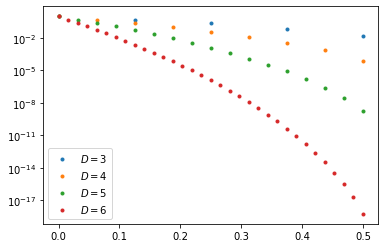

In [2]:
for D in np.arange(3, 7):
    c = np.arange(0, 2**(D-1)+1)
    ps = np.zeros(len(c))
    for i in c:
        ps[i] = np.math.factorial(2**(D-1))*np.math.factorial(2**D-i)/(np.math.factorial(2**(D-1)-i)*np.math.factorial(2**D))
    plt.scatter(c/2**D, ps, label=r"$D = %d$" % D, marker='.')
    print(D, ps[-1])
plt.yscale("log")
plt.legend()

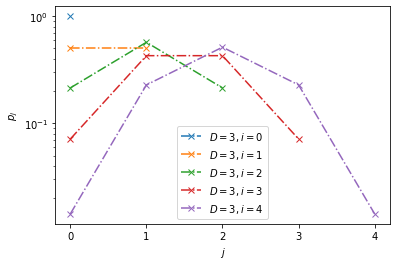

In [3]:
D = 3
for i in np.arange(0, 2**(D-1)+1):
    js = np.arange(0, i+1)
    ps = np.zeros(len(js))
    for m, j in enumerate(js):
        # print(i, j)
        L = np.math.factorial(2**(D-1))/(np.math.factorial(2**(D-1)-i+j)*np.math.factorial(i-j))
        R = np.math.factorial(2**(D-1))/(np.math.factorial(2**(D-1)-j)*np.math.factorial(j))
        Den = np.math.factorial(2**D)/(np.math.factorial(2**D-i)*np.math.factorial(i))
        ps[m] = L*R/Den
    plt.plot(js, ps, '-.x', label=r"$D = %d, i = %d$" % (D, i))
plt.ylabel(r"$p_j$")
plt.xlabel(r"$j$")
plt.xticks(np.arange(0, 2**(D-1)+1))
plt.yscale("log")
plt.legend()

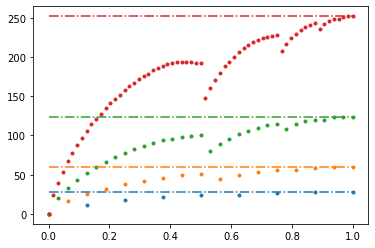

In [ ]:
def compute_expectation(D, i, M=2):
   # print(D, i)
    if i == 0:
        return 0

    if D == 1:
        return 2**M
    elif 0 < i < 2**D:
        js = np.arange(max(i-2**(D-1), 0), min(2**(D-1), i) + 1)
        print(i, js)
        ps = np.zeros(len(js))
        for m, j in enumerate(js):
            L = np.math.factorial(2**(D-1))/(np.math.factorial(2**(D-1)-i+j)*np.math.factorial(i-j))
            R = np.math.factorial(2**(D-1))/(np.math.factorial(2**(D-1)-j)*np.math.factorial(j))
            Den = np.math.factorial(2**D)/(np.math.factorial(2**D-i)*np.math.factorial(i))
            ps[m] = L*R/Den
        # print(ps)
        return 4 + sum([p * (compute_expectation(D-1, i-j) + compute_expectation(D-1, j)) for j, p in zip(js, ps)])
    elif i == 2**D:
        # print("Found purely positive node %d" % (2**M*(i-1)))
        return 2**M*(i-1)

M = 2
for D in np.arange(3, 7):
    c = np.arange(0, 2**D+1)
    ns = np.zeros(len(c))
    for i in c:
        ns[i] = np.round(compute_expectation(D, i))
        print("Done D=%d, i=%d" % (D, i))
    plt.scatter(c/2**D, ns, marker='.', label=r"$D = %d$" % D)
    plt.plot([0, 1], 2**M*(2**D-1) * np.ones(2), '-.', label="max")

4 1
3 2
2 3
1 4
1.0


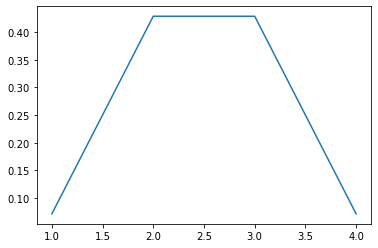

In [26]:
D = 3
i = 5
js = np.arange(max(i-2**(D-1), 0), min(2**(D-1), i) + 1)
ps = np.zeros(len(js))
for m, j in enumerate(js):
    print(i-j, j)
    L = np.math.factorial(2**(D-1))/(np.math.factorial(2**(D-1)-i+j)*np.math.factorial(i-j))
    R = np.math.factorial(2**(D-1))/(np.math.factorial(2**(D-1)-j)*np.math.factorial(j))
    Den = np.math.factorial(2**D)/(np.math.factorial(2**D-i)*np.math.factorial(i))
    ps[m] = L*R/Den
plt.plot(js, ps)
print(sum(ps))